# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

#### Es una variable binaria de dia laboral donde 0 no es dia laboral y 1 es dia laboral, a su vez se saca la media de bicicletas arrendadas por cada una de las categorias de la variable, 188 bicicletas para dias no laborales y 193 bicicletas para dias laborales. no se observa una variacion significativa entre ambos tipos de dia.

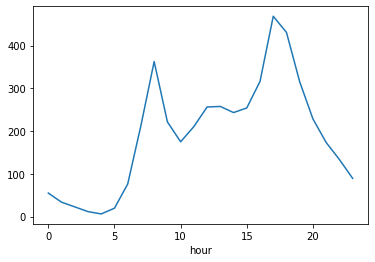

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

#### Este group by agrupa por hora del dia y muestra la cantidad de bicicletas arrendadas por hora del dia, se observa que los picos de arriendos son al momento de dirigirse al trabajo y volver del trabajo, es decir alrededor de las 7 y 5 de la tarde. 

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

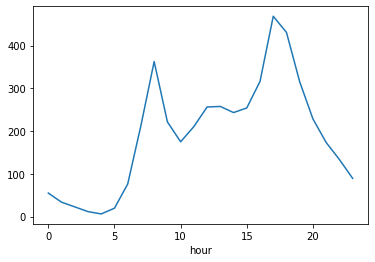

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

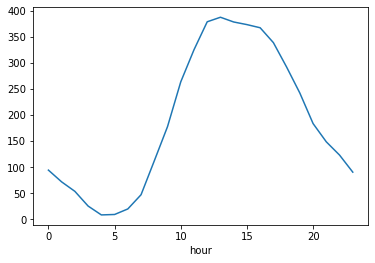

In [10]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

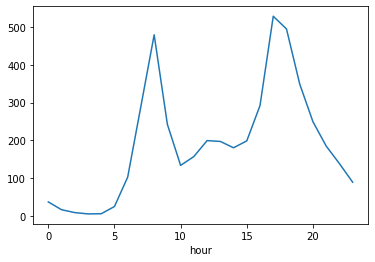

In [11]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

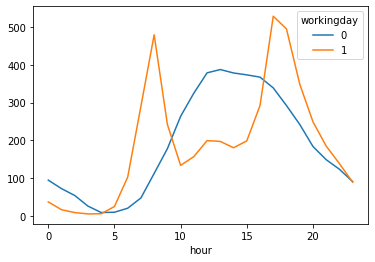

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

#### Cuando no es dia de trabajo, el pico de uso son hacia el medio dia, mientras que cuando es dia laboral, los picos de uso son en la mañana y en la tarde, momento en el cual los usuarios hacen el desplazamiento hacia sus sitios de trabajo o retornan al hogar. 

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [13]:
import warnings
warnings.filterwarnings("ignore")

reg = LinearRegression().fit(bikes[['hour','workingday']], bikes['total'])
r_sq = reg.score(bikes[['hour','workingday']], bikes['total'])
print('coefficient of determination:', r_sq)
print('coeficientes:', reg.coef_)

coefficient of determination: 0.16059115011434855
coeficientes: [10.49206282  4.07248627]


#### Un modelo de regresion lineal en este ejercicio tiene como limitante que no tiene un buen ajuste frente a los comportamientos de uso por horas de de las bicicletas ya que el comportamiento de los datos no tienen un comportamiento lineal por lo tanto el error va a ser alto frente a otros modelos que tengan un mejor ajuste. 

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [14]:
train = bikes[['hour','workingday','total']]
train['prediction'] = train.total.mean()

In [15]:
hour = 12
train['pred'] = train.loc[train.hour<hour, 'total'].mean()
train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()

(((train['total'] - train['pred'])**2).mean()) ** 0.5

165.84659205524616

#### Se definen las funciones de error para las variables 'Hour' y 'Workingday'

In [16]:
def error_hour(train, hour):
    train['pred'] = train.loc[train.hour<=hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print((((train['total'] - train['pred'])**2).mean()) ** 0.5)

In [17]:
def error_workingday(train, workingday):
    train['pred'] = train.loc[train.workingday<=workingday, 'total'].mean()
    train.loc[train.workingday>=workingday, 'pred'] = train.loc[train.workingday>=workingday, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

#### Se definen las particiones y se predice el valor 'Total'

In [18]:
train_izq = train.loc[train.hour<12].copy()

for hour in train_izq.hour.unique():
    print('Hora ',hour)
    error_hour(train_izq, hour)
print('----------------------------------')
for day in train_izq.workingday.unique():
    print('Día ',day)
    error_hour(train_izq, day)

Hora  0
149.68260515534544
Hora  1
148.48495392991947
Hora  2
145.9909082074158
Hora  3
142.20217807440514
Hora  4
136.6005633887934
Hora  5
128.29136248286198
Hora  6
117.88806986809966
Hora  7
112.06393389650661
Hora  8
124.02106957400237
Hora  9
141.94807854681287
Hora  10
146.00869513073735
Hora  11
147.27015118549804
----------------------------------
Día  0
149.68260515534544
Día  1
148.48495392991947


In [19]:
train_der = train.loc[train.hour>=12].copy()

for hour in train_der.hour.unique():
    print('Hora ',hour)
    error_hour(train_der, hour)
print('----------------------------------')
for day in train_der.workingday.unique():
    print('Día ',day)
    error_workingday(train_der, day)

Hora  12
180.41962937878372
Hora  13
180.4054943119366
Hora  14
180.40306352088876
Hora  15
180.2987292558608
Hora  16
180.3998729465303
Hora  17
181.73229383994922
Hora  18
177.3883114977777
Hora  19
168.60749557129296
Hora  20
163.7336200843912
Hora  21
163.9829586780525
Hora  22
167.56949196662893
Hora  23
173.2434145153285
----------------------------------
Día  0
180.41962937878372
Día  1
180.3645358710342


In [20]:
train_der_izq = train_der.loc[train_der.hour<16].copy()

for hour in train_der_izq.hour.unique():
    print('Hora ',hour)
    error_hour(train_der_izq, hour)
print('----------------------------------')
for day in train_der_izq.workingday.unique():
    print('Día ',day)
    error_workingday(train_der_izq, day)

Hora  12
146.17827533761016
Hora  13
146.16466155684472
Hora  14
146.15537688936675
Hora  15
146.17685469485798
----------------------------------
Día  0
146.17827533761016
Día  1
137.77951733519944


In [21]:
train_izq_izq = train_izq.loc[train_izq.hour<6].copy()

for hour in train_izq_izq.hour.unique():
    print('Hora ',hour)
    error_hour(train_izq_izq, hour)
print('----------------------------------')
for day in train_izq_izq.workingday.unique():
    print('Día ',day)
    error_workingday(train_izq_izq, day)

Hora  0
30.753540668567577
Hora  1
27.958800321548186
Hora  2
27.777964187806145
Hora  3
28.513837767518183
Hora  4
29.82822309257482
Hora  5
30.6732998038446
----------------------------------
Día  0
30.753540668567577
Día  1
29.855321991571646


In [22]:
train_izq_der = train_izq.loc[train_izq.hour>=6].copy()

for hour in train_izq_der.hour.unique():
    print('Hora ',hour)
    error_hour(train_izq_izq, hour)
print('----------------------------------')
for day in train_izq_der.workingday.unique():
    print('Día ',day)
    error_workingday(train_izq_izq, day)

Hora  6
30.753540668567577
Hora  7
30.753540668567577
Hora  8
30.753540668567577
Hora  9
30.753540668567577
Hora  10
30.753540668567577
Hora  11
30.753540668567577
----------------------------------
Día  0
30.753540668567577
Día  1
29.855321991571646


In [23]:
train_der_der = train_der.loc[train_der.hour>=16].copy()

for hour in train_der_der.hour.unique():
    print('Hora ',hour)
    error_hour(train_izq_izq, hour)
print('----------------------------------')
for day in train_der_der.workingday.unique():
    print('Día ',day)
    error_workingday(train_izq_izq, day)

Hora  16
30.753540668567577
Hora  17
30.753540668567577
Hora  18
30.753540668567577
Hora  19
30.753540668567577
Hora  20
30.753540668567577
Hora  21
30.753540668567577
Hora  22
30.753540668567577
Hora  23
30.753540668567577
----------------------------------
Día  0
30.753540668567577
Día  1
29.855321991571646


#### Calculamos el RMSE para cada predicción

In [24]:
from sklearn import metrics
import numpy as np
print('RMSE: ',np.sqrt(metrics.mean_squared_error(train.total, train.prediction)))

RMSE:  181.1361335742659


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

#### Importamos las librerías y definimos X y Y

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

X = bikes[['hour','workingday']]
y = bikes['total']

Luego procedemos a realizar CrossValidation para definir cual es el nivel de profundidad con el cual se consigue el menor RMSE

Depth:  1    RMSE:  150.58047729549764
Depth:  2    RMSE:  142.79903210731652
Depth:  3    RMSE:  136.77375465075121
Depth:  4    RMSE:  132.43260320072835
Depth:  5    RMSE:  117.66091036003505
Depth:  6    RMSE:  108.63388688155047
Depth:  7    RMSE:  107.64196789476493
Depth:  8    RMSE:  107.59630102700518
Depth:  9    RMSE:  107.58012231930059
Depth:  10    RMSE:  107.57576561312104
Depth:  11    RMSE:  107.57576561312104
Depth:  12    RMSE:  107.57576561312104
Depth:  13    RMSE:  107.57576561312104
Depth:  14    RMSE:  107.57576561312104


Text(0, 0.5, 'RMSE (lower is better)')

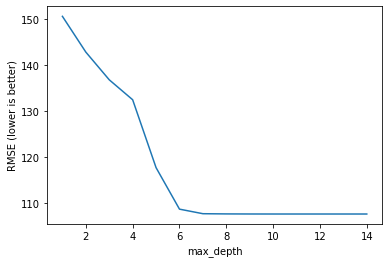

In [26]:
max_depth_range = range(1, 15)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    print('Depth: ',depth,'   RMSE: ',np.mean(np.sqrt(-MSE_scores)))

%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

A partir de los resultados del CrossValidation es posible observar que valores de profundidad (Depth) mayores a 7 el RMSE es casi constante y, por tanto, se define el DT Regression con max_depth:7

RMSE_manual:  181.1361335742659
RMSE max_depth 7: 107.64196789476493

Podemos observar que DTRegressor hecho en scikit-learn tiene un menor RMSE en comparación con el DT hecho manualmente.

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [27]:
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [28]:
df.shape

(6000, 61)

In [29]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [30]:
y.mean()

0.5

In [31]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

#### Estimación del DT Classifier

Procedemos a realizar CrossValidation para definir cual es el nivel de profundidad con el cual se maximiza la precisión del modelo (Accuracy)

In [32]:
# list of values to try for max_depth
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []
f1_scores= []

## Decision Tree Classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    f1_scores.append(cross_val_score(clf, X, y, cv=10, scoring='f1').mean())

Text(0, 0.5, 'Accuracy')

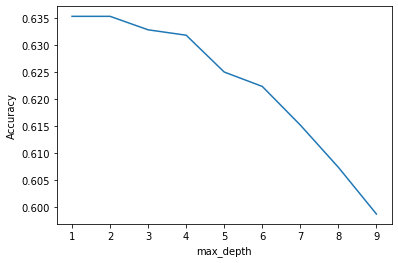

In [33]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'f1_score')

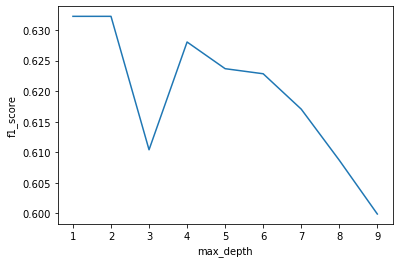

In [34]:
plt.plot(max_depth_range, f1_scores)
plt.xlabel('max_depth')
plt.ylabel('f1_score')

In [35]:
accuracy = sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
f1 = sorted(zip(f1_scores, max_depth_range))[::-1][0]

print('max_depth Accuracy: ',accuracy[1])
print('Accuracy: ',accuracy[0])
print('max_depth F1-Score: ',f1[1])
print('F1_score: ',f1[0])

max_depth Accuracy:  2
Accuracy:  0.6353333333333333
max_depth F1-Score:  2
F1_score:  0.6322597160569876


#### Se puede observar que max_depth=2 genera el mayor nivel de precisión (accuracy) y f1-score.

#### Estimación de la regresión logística

In [36]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegressionCV(cv = 5)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('F1 - Score: '+ str(metrics.f1_score(y_pred, y_test)))

Accuracy Score: 0.612
F1 - Score: 0.6002747252747253


#### Podemos observar que el DT CLassifier tiene mejores valores de Accuracy y F1-Score comparado con los resultados del modelo de regresión logística ajustado.

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [37]:
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [38]:
np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(300)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

In [39]:
trees2 = {}
for i in range(n_estimators):
    trees2[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees2[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(n_estimators):
    y_pred_df.iloc[:, i+100] = trees2[i].predict(X_test)

In [40]:
logistic = {}
for i in range(n_estimators):
    logistic[i] = LogisticRegression()
    logistic[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(n_estimators):
    y_pred_df.iloc[:, i+200] = logistic[i].predict(X_test)
    
y_pred_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,0,0,1,0,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,0,1,1,1,0,0
2520,1,0,1,1,1,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
3721,0,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2227,1,1,1,1,1,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,0
5684,1,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Incluimos la predicción de cada modelo para cada observación en un mismo DataFrame para proceder con el ensamble.

# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [41]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('F1 - Score: ', metrics.f1_score(y_pred, y_test))

Accuracy Score:  0.61
F1 - Score:  0.7136563876651983


Podemos observar que el F1-Score mejora significativamente con el modelo Bagging estimado en comparación con los modelos de DT Classifier y la Regresión Logística.

# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [42]:
sumy_pred = y_pred_df.sum(axis=1)

In [43]:
y_prob = sumy_pred/300

In [44]:
from sklearn.metrics import roc_curve, precision_recall_curve
def threshold_search(y_test, y_prob, plot=False):
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    thresholds = np.append(thresholds, 1.001) 
    F = 2 / (1/precision + 1/recall)
    best_score = np.max(F)
    best_th = thresholds[np.argmax(F)]
    if plot:
        plt.plot(thresholds, F, '-b')
        plt.plot([best_th], [best_score], '*r')
        plt.show()
    print('Best threshold: ',best_th,' Best F1-Score: ',best_score)

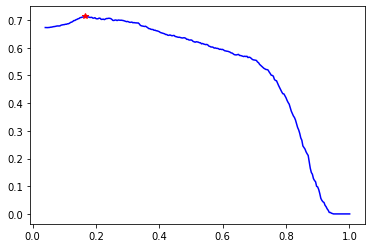

Best threshold:  0.16666666666666666  Best F1-Score:  0.7136563876651982


In [45]:
threshold_search(y_test, y_prob, plot=True)

Podemos observar que un Threshold de 0.166 es el valor que maximiza el F1-Score

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [46]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

samples_oob = samples_oob*3

In [47]:
errors = np.zeros(300)
y_pred_ = []

for i in range(100):
    y_pred_.append(trees[i].predict(X_train.iloc[samples_oob[i]]))

for i in range(100):
    y_pred_.append(trees2[i].predict(X_train.iloc[samples_oob[i+100]]))
    
for i in range(100):
    y_pred_.append(logistic[i].predict(X_train.iloc[samples_oob[i+200]]))

for i in range(300):
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_[i])

In [48]:
alpha = (1 - errors) / (1 - errors).sum()

In [49]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

In [50]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('F1 - Score: '+ str(metrics.f1_score(y_pred, y_test)))

Accuracy Score: 0.63
F1 - Score: 0.6232179226069245


# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [51]:
y_prob = weighted_sum_1/1

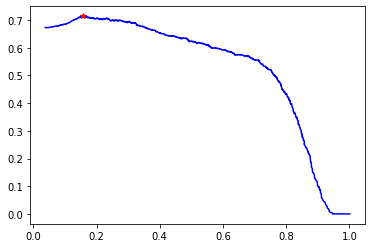

Best threshold:  0.1560009096954322  Best F1-Score:  0.7137981472452463


In [52]:
threshold_search(y_test, y_prob, plot=True)

Podemos observar que un Threshold de 0.156 es el valor que maximiza el F1-Score

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers


Modify the probability threshold such that maximizes the F1-Score

In [53]:
lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.predict_proba(X_test)[:,1]

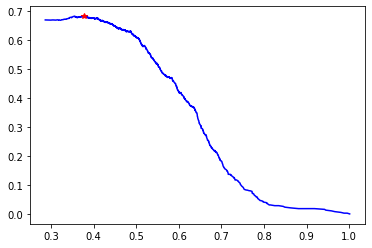

Best threshold:  0.37763085188103523  Best F1-Score:  0.6832774317201724


In [54]:
threshold_search(y_test, y_pred_lr, plot=True)

Podemos observar que un Threshold de 0.378 es el valor que maximiza el F1-Score